In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [5]:
history_df = pd.read_csv("../data/Coca-Cola_stock_history.csv")
info_df = pd.read_csv("../data/Coca-Cola_stock_info.csv")

history_df.head()


,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,1962-01-02,0.050016,0.051378,0.050016,0.050016,806400,0.0,0
1,1962-01-03,0.049273,0.049273,0.048159,0.048902,1574400,0.0,0
2,1962-01-04,0.049026,0.049645,0.049026,0.049273,844800,0.0,0
3,1962-01-05,0.049273,0.049892,0.048035,0.048159,1420800,0.0,0
4,1962-01-08,0.047787,0.047787,0.046735,0.047664,2035200,0.0,0


In [6]:
history_df.shape


(15311, 8)

In [7]:
history_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15311 entries, 0 to 15310
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          15311 non-null  object 
 1   Open          15311 non-null  float64
 2   High          15311 non-null  float64
 3   Low           15311 non-null  float64
 4   Close         15311 non-null  float64
 5   Volume        15311 non-null  int64  
 6   Dividends     15311 non-null  float64
 7   Stock Splits  15311 non-null  int64  
dtypes: float64(5), int64(2), object(1)
memory usage: 897.2+ KB


In [8]:
history_df.describe()


,Open,High,Low,Close,Volume,Dividends,Stock Splits
count,15311.000000,15311.000000,15311.000000,15311.000000,1.531100e+04,15311.000000,15311.000000
mean,11.812883,11.906708,11.717375,11.815409,9.139213e+06,0.001678,0.001110
std,15.025726,15.133336,14.915580,15.026316,7.957947e+06,0.021302,0.049148
min,0.037154,0.037279,0.034890,0.037028,7.680000e+04,0.000000,0.000000
25%,0.238453,0.240305,0.236415,0.238312,2.889600e+06,0.000000,0.000000
50%,4.935146,4.980985,4.884242,4.937339,7.708800e+06,0.000000,0.000000
75%,17.383926,17.612844,17.168283,17.415106,1.307130e+07,0.000000,0.000000
max,66.037933,66.235058,64.776308,65.259270,1.241690e+08,0.440000,3.000000


In [10]:
history_df['Date'] = pd.to_datetime(history_df['Date'], errors='coerce')


In [11]:
history_df.isnull().sum()


Date            8840
Open               0
High               0
Low                0
Close              0
Volume             0
Dividends          0
Stock Splits       0
dtype: int64

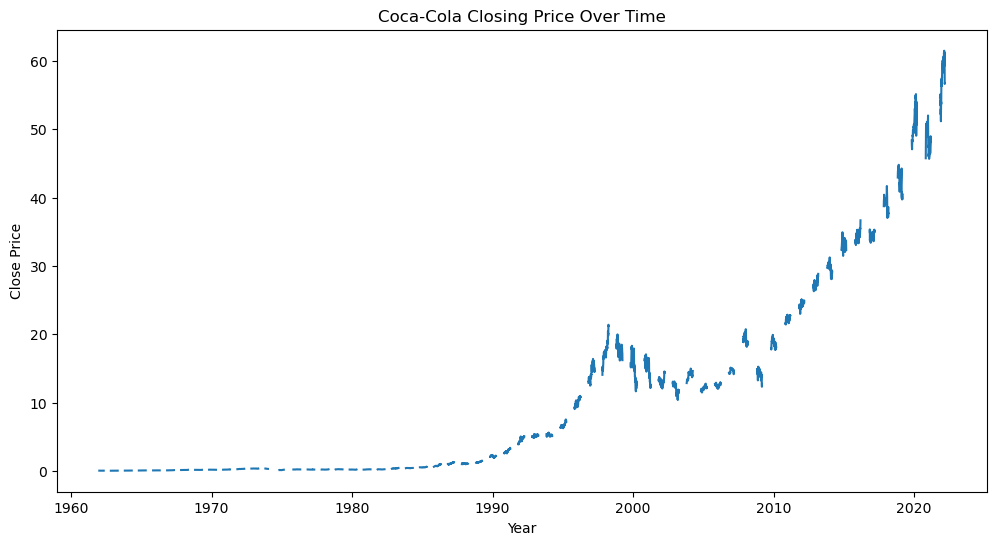

In [12]:
plt.figure(figsize=(12,6))
plt.plot(history_df['Date'], history_df['Close'])
plt.title("Coca-Cola Closing Price Over Time")
plt.xlabel("Year")
plt.ylabel("Close Price")
plt.show()


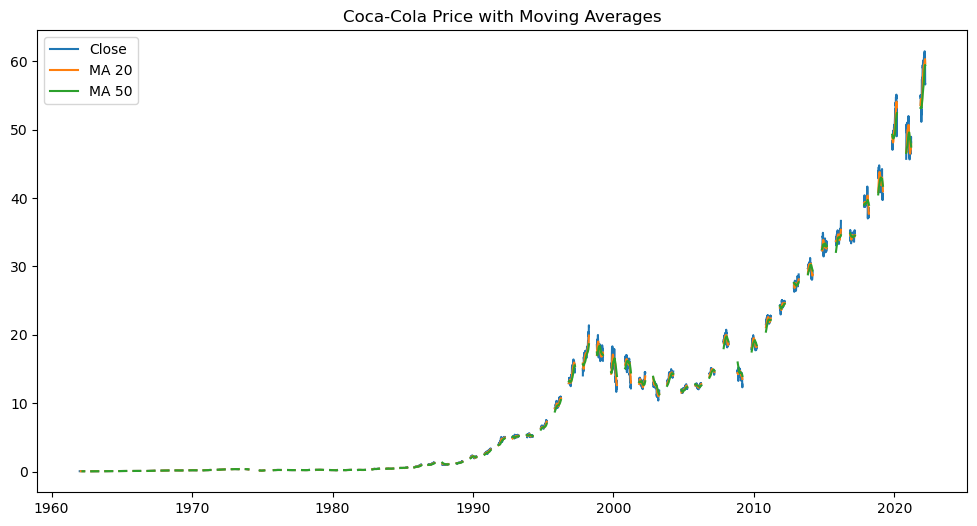

In [13]:
history_df['MA_20'] = history_df['Close'].rolling(20).mean()
history_df['MA_50'] = history_df['Close'].rolling(50).mean()

plt.figure(figsize=(12,6))
plt.plot(history_df['Date'], history_df['Close'], label="Close")
plt.plot(history_df['Date'], history_df['MA_20'], label="MA 20")
plt.plot(history_df['Date'], history_df['MA_50'], label="MA 50")
plt.legend()
plt.title("Coca-Cola Price with Moving Averages")
plt.show()


In [14]:
history_df['Daily_Return'] = history_df['Close'].pct_change()
history_df[['Date', 'Daily_Return']].head()


,Date,Daily_Return
0,1962-01-02,NaN
1,1962-01-03,-0.022280
2,1962-01-04,0.007598
3,1962-01-05,-0.022616
4,1962-01-08,-0.010282


In [15]:
history_df['Volatility'] = history_df['Daily_Return'].rolling(20).std()
history_df[['Date', 'Volatility']].head()


,Date,Volatility
0,1962-01-02,NaN
1,1962-01-03,NaN
2,1962-01-04,NaN
3,1962-01-05,NaN
4,1962-01-08,NaN


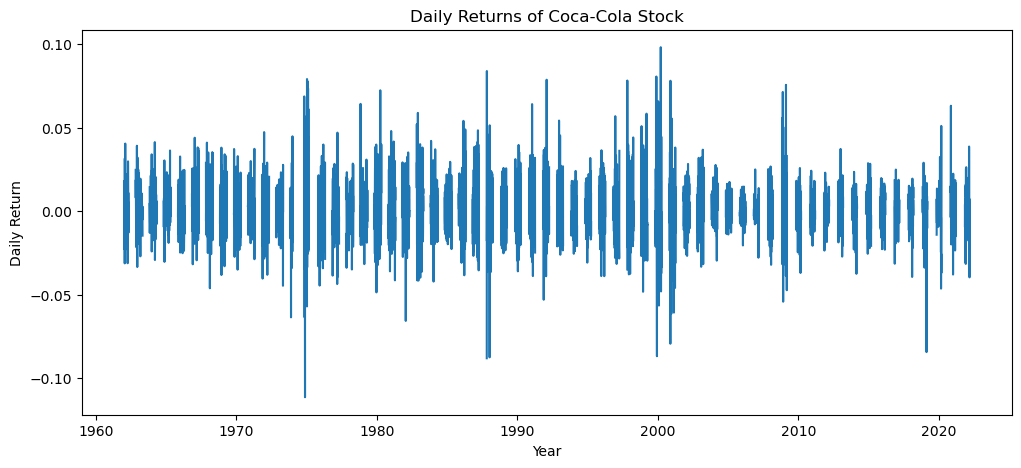

In [16]:
plt.figure(figsize=(12,5))
plt.plot(history_df['Date'], history_df['Daily_Return'])
plt.title("Daily Returns of Coca-Cola Stock")
plt.xlabel("Year")
plt.ylabel("Daily Return")
plt.show()


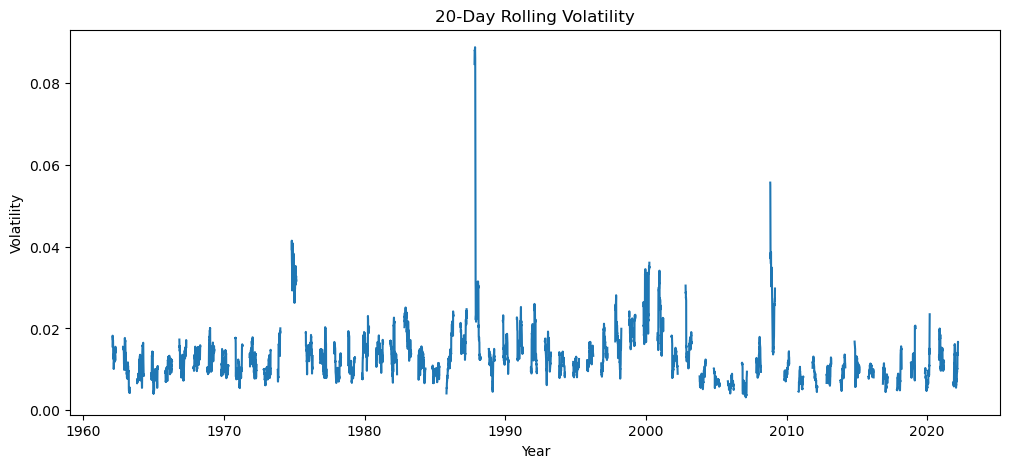

In [17]:
plt.figure(figsize=(12,5))
plt.plot(history_df['Date'], history_df['Volatility'])
plt.title("20-Day Rolling Volatility")
plt.xlabel("Year")
plt.ylabel("Volatility")
plt.show()


In [ ]:
## Key Insights from EDA

- Coca-Cola stock shows a strong long-term upward trend.
- Moving averages (20-day and 50-day) smooth short-term fluctuations.
- Daily returns fluctuate around zero, indicating stable performance.
- Rolling volatility remains relatively low, showing lower investment risk.


In [22]:
""" Conclusion

- This Project analyzed historical Coca-Cola stock data using Python.
- EDA techniques revealed long-term growth trends and relatively stable volatility.
- Such analysis helps investors understand price behavior and risk."""


' Conclusion\n\n- This Project analyzed historical Coca-Cola stock data using Python.\n- EDA techniques revealed long-term growth trends and relatively stable volatility.\n- Such analysis helps investors understand price behavior and risk.'